In [1]:
%pylab inline
import numpy as np
import pylab as pl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import svm
from sklearn import datasets

In [3]:

# 加载数据
svc = svm.SVC(kernel='linear') # 线性SVM模型训练
iris = datasets.load_iris()
X = iris.data[:, :2]  # 选取前两列特征
y = iris.target

svc.fit(X, y)

SVC(kernel='linear')

In [4]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y): # 数据可视化
    """
    可视化分类器决策边界和支持向量的函数
    """
    estimator.fit(X, y)

    # 确定网格最大最小值作为边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 产生网格节点
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # 基于分类器，对网格节点做预测
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # 对预测结果上色
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 同时对原始训练样本上色
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()
    pl.show()

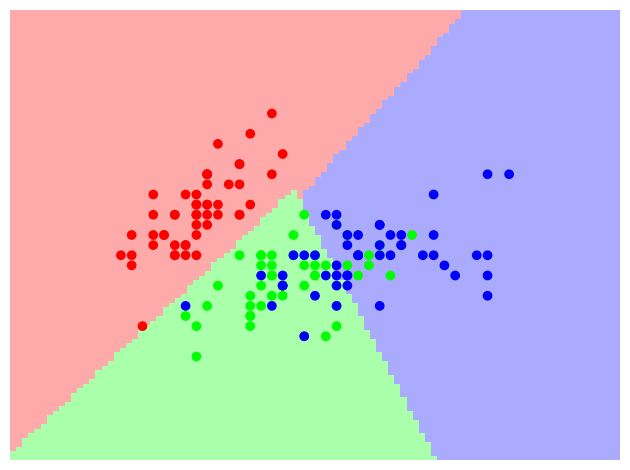

In [5]:
# 绘制结果
plot_estimator(svc, X, y)

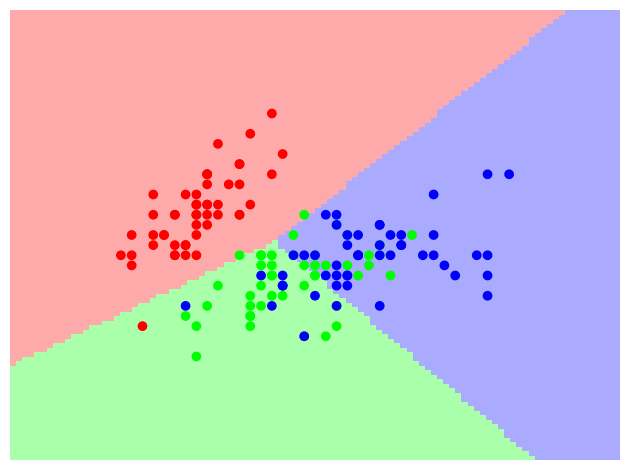

In [6]:
plot_estimator(svm.LinearSVC(), X, y) # 比较LinearSVC与SVC(kernel='linear')的分类效果

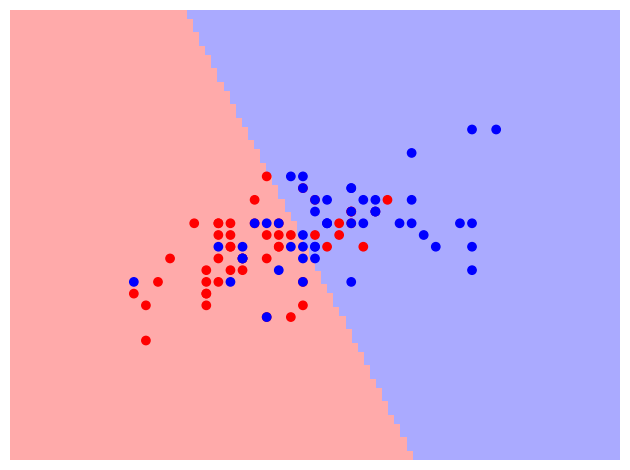

In [7]:
# 使用前两列特征可视化
# 聚焦类别1和2的二分类问题，并标记支持向量
X_2d = X[np.isin(y, [1, 2])]
y_2d = y[np.isin(y, [1, 2])]
plot_estimator(svc,X_2d,y_2d)
pl.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=80,
           facecolors='none', zorder=10)

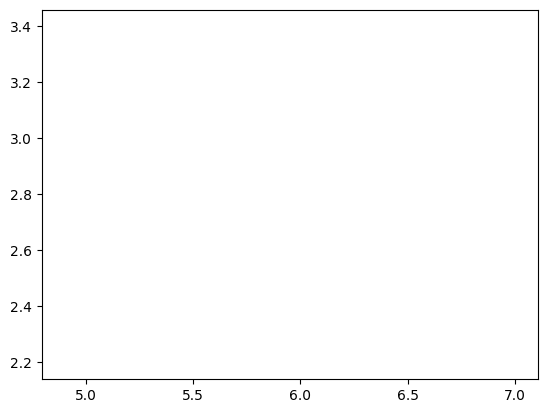

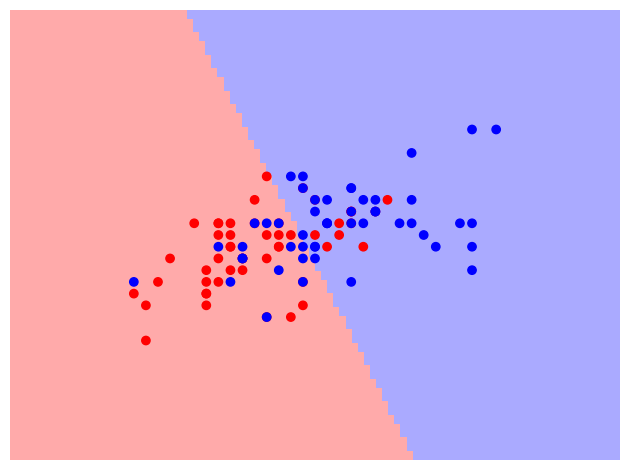

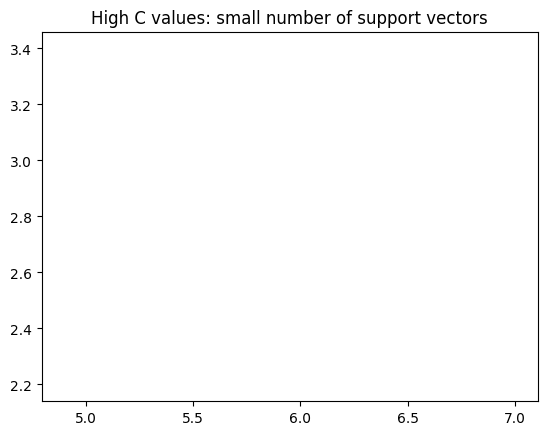

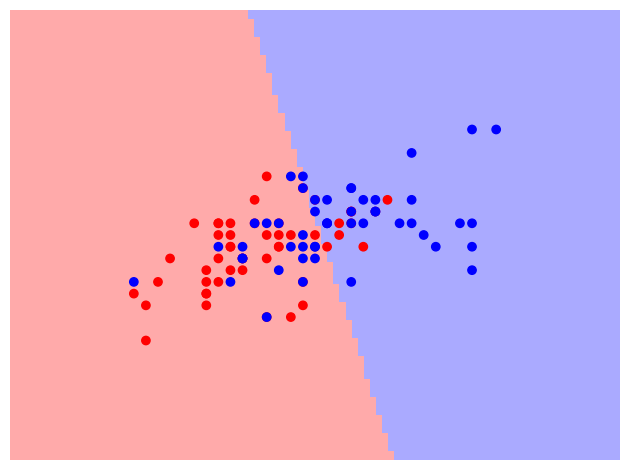

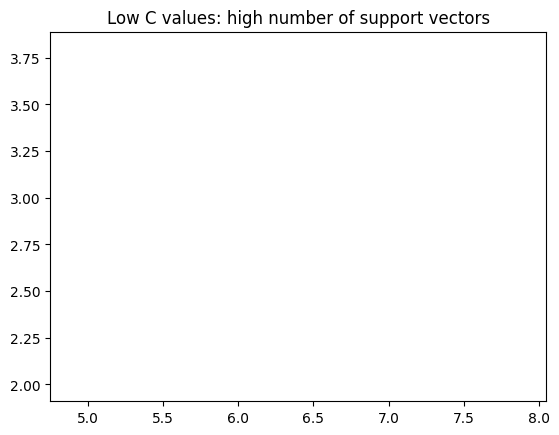

In [8]:
# 研究不同C值对支持向量数量和间隔宽度的影响
svc = svm.SVC(kernel='linear', C=1e3)
plot_estimator(svc, X_2d, y_2d)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
           facecolors='none', zorder=10)
pl.title('High C values: small number of support vectors')
pl.show()

svc = svm.SVC(kernel='linear', C=1e-3)
plot_estimator(svc, X_2d, y_2d)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
           facecolors='none', zorder=10)
pl.title('Low C values: high number of support vectors')
pl.show()


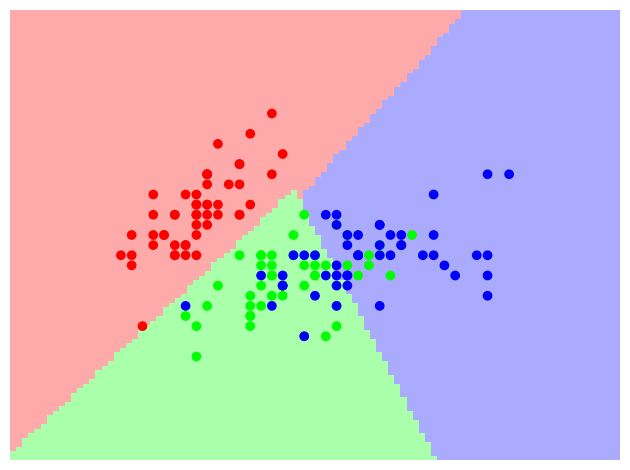

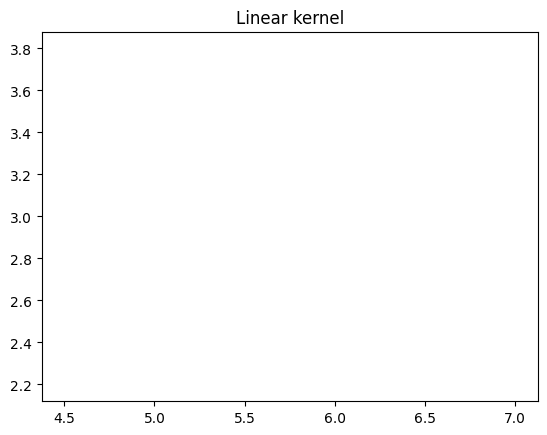

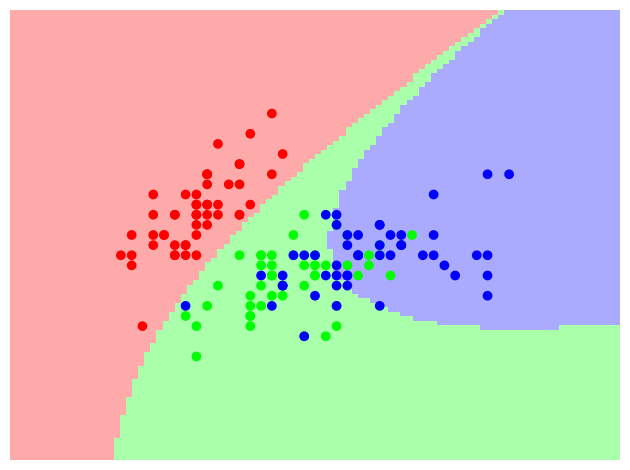

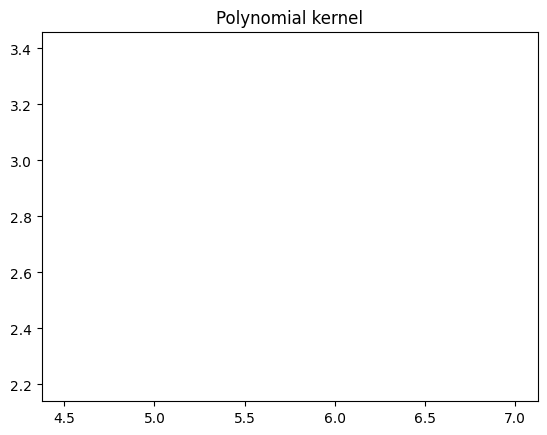

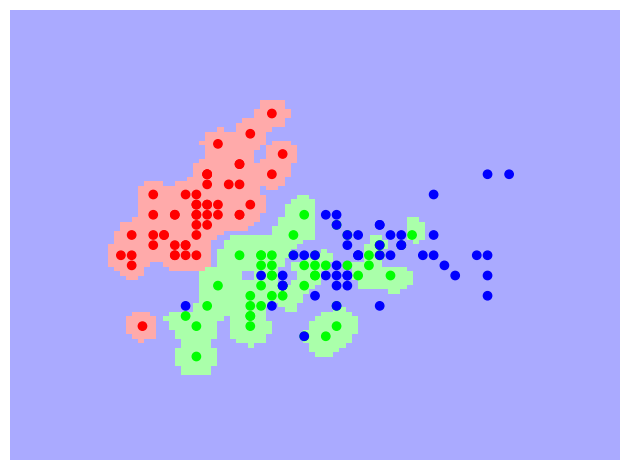

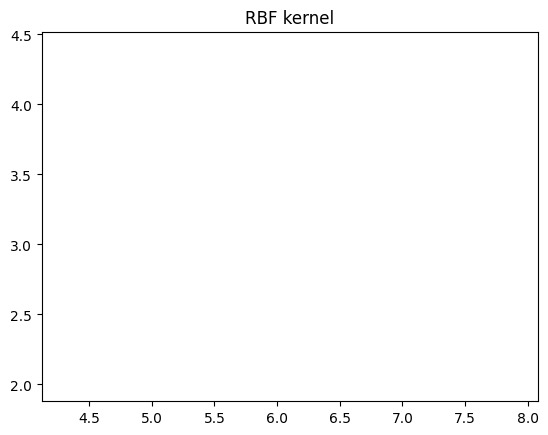

In [9]:
# 测试不同核函数在原始数据上的分类效果
# 使用线性内核
svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
           facecolors='none', zorder=10)
pl.title('Linear kernel')
pl.show()
# 使用多项式内核
svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
           facecolors='none', zorder=10)
pl.title('Polynomial kernel')
pl.show()
# 使用径向基函数（RBF）内核
svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
           facecolors='none', zorder=10)
pl.title('RBF kernel')
pl.show()